## **Práctica 6**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##### **Datos de entrada**

In [69]:
x = np.array([
    [1, 0],
    [0, 1],
    [0, 0],
    [1, 1]])

y = np.array([
    [1],
    [1],
    [0],
    [0]])

##### **Pesos aleatorios con una distribución normal centrada en 0 y std = 0.1**

In [108]:
w1 = np.random.normal(0.0, 0.1, (2,2))
w2 = np.random.normal(0.0, 0.1, (2,2))
w3 = np.random.normal(0.0, 0.1, (2,1))

##### **Definición de la función de activación ReLu**

In [3]:
def relu(x):
    return np.maximum(x, 0)

##### **Derivada de la función de activación**

In [4]:
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

##### **Forward Propagation**

* La capa de salida de no posee activación

In [112]:
def forward_propagation(x, w1, w2, w3, predict=False):
    
    input_H1 = np.matmul(x,w1)
    output_H1 = relu(input_H1)
    
    input_H2 = np.matmul(output_H1, w2)
    output_H2 = relu(input_H2)
    
    output = np.matmul(output_H2, w3)
    
    if predict:
        return output
    
    return output_H1, output_H2, output

##### **Back Propagation**

In [8]:
def back_propagation(output_H1, output_H2, output, y):
    
    error = y - output
    
    delta = error * reluDerivative(output)
    error_H2 = np.matmul(delta,w3.T)
    delta_H2 = error_H2 * reluDerivative(output_H2)
    
    error_H1 = np.matmul(delta_H2,w2.T)
    delta_H1 = error_H1 * reluDerivative(output_H1)
    
    return error, delta, delta_H2, delta_H1

##### **Función de entreno**

In [9]:
def fit (lr, epochs):
    costs = []
    global H2
    global w1
    global w2
    global w3
    output_H2 = []
    
    for i in range(epochs):
        output_H1, output_H2, output = forward_propagation(x, w1, w2, w3)
        error, delta, delta_H2, delta_H1 = back_propagation(output_H1, output_H2, output, y)
    
        w3 += (np.matmul(output.T,delta)*lr)
        w2 += (np.matmul(output_H2.T,delta_H2)*lr)
        w1 += (np.matmul(output_H1.T,delta_H1)*lr)

        c = np.mean(error)
        costs.append(c)
    
        if i % 10000 == 0:
            print(f"Iteración: {i}. Error: {c}")

    print("Entreno completo!")
    
    return output_H2

##### **Función de predicción**

In [10]:
def predict():
    prediction = forward_propagation(x, w1, w2, w3, True)
    print("Predicción")
    print(np.round(prediction))

##### **Función de gráfico**

In [11]:
def plot(hidden_layer):
    plt.xlabel("X1")
    plt.ylabel("X2") 
    plt.scatter(hidden_layer[:,0], hidden_layer[:,1], alpha=0.6, c=['green','orange','brown','dodgerblue'])
    plt.show()

##### **Experimento 1:** learning_rate = 0.001 y epochs = 30000 

In [33]:
H2 = fit(0.001,30000)

Iteración: 0. Error: 0.4999148206106549
Iteración: 10000. Error: 0.01782354619509205
Iteración: 20000. Error: 0.013777990510046134
Entreno completo!


In [34]:
predict()

Predicción
[[1.]
 [0.]
 [0.]
 [1.]]


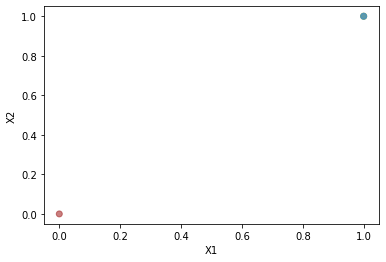

In [35]:
plot(H2)

##### **Experimento 2:** learning_rate = 0.005 y epochs = 15000 

In [101]:
H2 = fit(0.005,15000)

Iteración: 0. Error: 0.5000875677975626
Iteración: 10000. Error: 0.005692631064316306
Entreno completo!


In [102]:
predict()

Predicción
[[1.]
 [0.]
 [0.]
 [1.]]


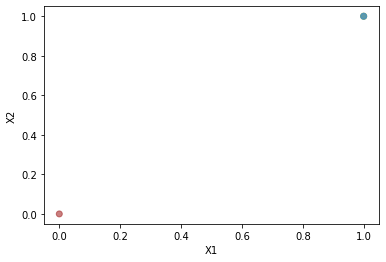

In [103]:
plot(H2)

##### **Experimento 3:** learning_rate = 0.0077 y epochs = 25000 

In [109]:
H2 = fit(0.0077,25000)

Iteración: 0. Error: 0.4999976787582342
Iteración: 10000. Error: 8.881784197001252e-16
Iteración: 20000. Error: 8.881784197001252e-16
Entreno completo!


In [110]:
predict()

Predicción
[[1.]
 [0.]
 [0.]
 [1.]]


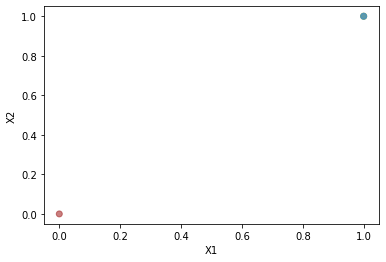

In [111]:
plot(H2)

##### **Experimento 4:** learning_rate = 0.00088 y epochs = 25000

In [81]:
H2 = fit(0.00088,25000)

Iteración: 0. Error: 0.49919051357929334
Iteración: 10000. Error: 9.547918011776346e-15
Iteración: 20000. Error: 9.547918011776346e-15
Entreno completo!


In [82]:
predict()

Predicción
[[1.]
 [0.]
 [0.]
 [1.]]


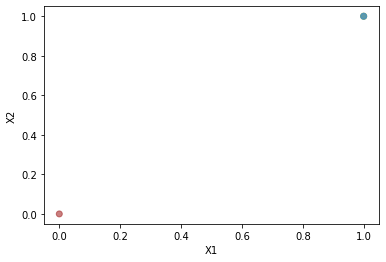

In [83]:
plot(H2)

##### **Experimento 5:** learning_rate = 0.00097 y epochs = 15000 

In [92]:
H2 = fit(0.00097,15000)

Iteración: 0. Error: 0.49995345470944785
Iteración: 10000. Error: 1.6375789613221059e-15
Entreno completo!


In [93]:
predict()

Predicción
[[1.]
 [0.]
 [0.]
 [1.]]


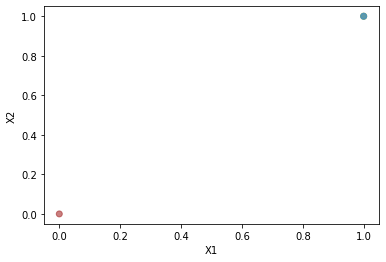

In [94]:
plot(H2)

##### **Conclusiones**

En la observación de los experimentos se pudo determinar que para llegar a la convergencia el factor de aprendizaje debe aproximarse a 0.001 y la cantidad de epocas oscila entre 10000-15000 y aunque los pesos son aleatorios, se puede asegurar lo antes expuesto ya que los parametros para determinar los pesos iniciales poseen una distribución normal centrada en 0 y std = 0.1.